In [ ]:
import torch
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import matplotlib.pyplot as plt
import numpy as np
import torchvision


In [ ]:
BATCH_SIZE = 28
LEARNING_RATE = 0.001
EPOCH_NO= 5

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])

In [ ]:
trainSet = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                             download=True, 
                                             transform=transform)
testSet = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                            download=True, 
                                            transform=transform)
loaderTrainData = torch.utils.data.DataLoader(trainSet, batch_size=BATCH_SIZE,
                                          shuffle=True)
loaderTestData = torch.utils.data.DataLoader(testSet, batch_size=BATCH_SIZE,
                                          shuffle=True)

In [ ]:
# define constants

size1=len(trainSet)/BATCH_SIZE

print(size1)

2142.8571428571427


In [ ]:
classes = ('T-Shirt','Trouser','Pullover','Dress','Coat','Sandal',
           'Shirt','Sneaker','Bag','Ankle Boot')

torch.Size([28, 1, 28, 28])
torch.Size([28])


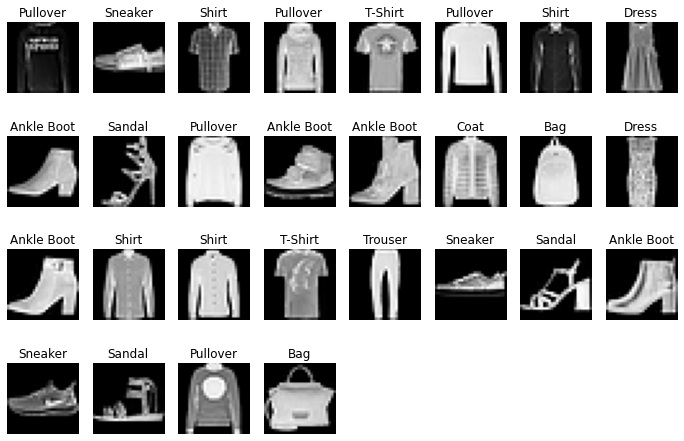

In [ ]:
for batch_1 in loaderTrainData:
    batch = batch_1
    break
print(batch[0].shape) # as batch[0] contains the image pixels -> tensors
print(batch[1].shape) # batch[1] contains the labels -> tensors
plt.figure(figsize=(12, 8))
for i in range (batch[0].shape[0]):
    plt.subplot(4, 8, i+1)
    plt.axis('off')
    plt.imshow(batch[0][i].reshape(28, 28), cmap='gray')
    plt.title(classes[batch[1][i]])
    plt.savefig('fashion_mnist.png')
plt.show()

In [ ]:
class ShehrozNet(nn.Module):
    def __init__(self):
        super(ShehrozNet, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=64, 
                               kernel_size=3,padding=1)
        self.b1=nn.BatchNorm2d(num_features=64)
        

        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, 
                               kernel_size=3,padding=1)
        self.b2=nn.BatchNorm2d(num_features=128)
        

        self.conv3= nn.Conv2d(in_channels=128, out_channels=256, 
                              kernel_size=3,padding=1)
        self.b3=nn.BatchNorm2d(num_features=256)


        self.conv4= nn.Conv2d(in_channels=256,out_channels=256, 
                               kernel_size=3,padding=1)
        
        self.b4=nn.BatchNorm2d(num_features=256)
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(in_features=4*4*256, out_features=1024)

        self.fc2 = nn.Linear(in_features=1024, out_features=1024)

        self.fc3 = nn.Linear(in_features=1024, out_features=10)

        self.softmax = nn.Softmax(dim=1)
        self.initWeight()
        
    def forward(self, x):

        x = F.relu(self.b1(self.conv1(x)))
        x = F.max_pool2d(x, kernel_size=2,ceil_mode=True)

        x = F.relu(self.b2(self.conv2(x)))
        x = F.max_pool2d(x, kernel_size=2,ceil_mode=True)

        x = F.relu(self.b3(self.conv3(x)))
        x = F.relu(self.b4(self.conv4(x)))
        x = F.max_pool2d(x, kernel_size=2,ceil_mode=True)

        
        x=self.drop_out(x)
        x = x.view(-1, torch.prod(torch.tensor(x.shape[1:])).item())
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.softmax(x)

        return x
        
        
    def initWeight(self):
        for m in self.modules():
          if isinstance(m, nn.Conv2d):
            nn.init.kaiming_uniform_(m.weight)   
            if m.bias is not None:
              nn.init.constant_(m.bias, 0)
              
            elif isinstance(m, nn.Linear):
              nn.init.kaiming_uniform_(m.weight)
              nn.init.constant_(m.bias, 0)
        
net = ShehrozNet()
print(net)

ShehrozNet(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (b1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (b2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (b3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (b4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop_out): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=4096, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)


In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=LEARNING_RATE, momentum=0.9)

In [ ]:
# if GPU is available, then use GPU, else use CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
net.to(device)

cuda:0


ShehrozNet(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (b1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (b2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (b3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (b4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop_out): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=4096, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [ ]:
# function to calculate accuracy
def accuracyCalculator(loaderData):
    T = 0
    corr = 0
    for d in loaderData:
        labels= d[1].to(device)
        inputs = d[0].to(device)
        outputs = net(inputs)


        _, predictedVals = torch.max(outputs.data, 1)


        T += labels.size(0)

        corr += (predictedVals == labels).sum().item()
        
    return ((100*corr)/T)

In [ ]:
def bigThing():

    testAccuracy = []
    lossEpoch = []
    trainAccuracy = []
    lossRunning = 0

    for epoch in range(EPOCH_NO):
        
        lossRunning = 0


        for i, data in enumerate(loaderTrainData , 0):

            inputs, labels = data[0].to(device), data[1].to(device)
            # set parameter gradients to zero

            optimizer.zero_grad()
            # forward pass

            outputs = net(inputs)

            loss = loss_function(outputs, labels)

            loss.backward()
            optimizer.step()

            lossRunning += loss.item()

        lossEpoch.append(lossRunning/size1)
        trainAccuracy.append(accuracyCalculator(loaderTrainData))
        testAccuracy.append(accuracyCalculator(loaderTestData))


        print('Epoch: %d of %d, Train Acc: %0.3f, Test Acc: %0.3f, Loss: %0.3f'
              % (epoch + 1, EPOCH_NO, trainAccuracy[epoch], testAccuracy[epoch], lossRunning/size1))
        
    return lossEpoch, trainAccuracy, testAccuracy

In [ ]:
start = time.time()
epoch_loss, train_acc, test_acc = bigThing()
end = time.time()
print('%0.2f minutes' %((end - start) / 60))

Epoch: 1 of 5, Train Acc: 79.468, Test Acc: 79.210, Loss: 1.874
Epoch: 2 of 5, Train Acc: 82.370, Test Acc: 81.840, Loss: 1.660
Epoch: 3 of 5, Train Acc: 83.320, Test Acc: 82.500, Loss: 1.641
Epoch: 4 of 5, Train Acc: 83.787, Test Acc: 83.000, Loss: 1.632
Epoch: 5 of 5, Train Acc: 84.165, Test Acc: 83.250, Loss: 1.625
3.00 minutes
